In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

def getRixs(path):
    RIXS=np.loadtxt(path,skiprows=5)
    RIXS = RIXS.T[1:]
    #RIXS_Real=[]
    RIXS_Img=[]
    for i in range(0,int(len(RIXS)/2)):
        #RIXS_Real.append(RIXS[2*i])
        RIXS_Img.append(RIXS[2*i+1])
    return -np.array(RIXS_Img).T

In [24]:
def plot_RIXS_array(name,type,edge,xmin,xmax,ymin,ymax):
    RIXS_z_z       = getRixs(name + "/data/RIXS/"+type+"/"+edge+"/RIXS_z_z.dat")
    RIXS_z_x       = getRixs(name + "/data/RIXS/"+type+"/"+edge+"/RIXS_z_x.dat")
    RIXS_zpx_zpx   = getRixs(name + "/data/RIXS/"+type+"/"+edge+"/RIXS_zpx_zpx.dat")
    RIXS_zpix_zpix = getRixs(name + "/data/RIXS/"+type+"/"+edge+"/RIXS_zpix_zpix.dat")
    RIXS = [RIXS_z_z, RIXS_z_x, RIXS_zpx_zpx, RIXS_zpix_zpix]
    label= ["z to z", "z to x", "z+x to z+x", "z+ix to z+ix"] 
    # Set up figure and image grid
    fig = plt.figure(figsize=(16, 4))
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,4),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )
    
    grid[0].set_ylabel("relative E$_{diff} [eV]$")
    
    for i,ax in enumerate(grid):
        ax.set_xlabel("relative E$_{exc}$ [eV]")
        ax.set_title(label[i])
        im = ax.matshow(RIXS[i]/RIXS[i].max(),extent=[xmin,xmax,ymin,ymax],aspect=.6)
        if i != 0:
            ax.axes.get_yaxis().set_visible(False)
    # Colorbar
    ax.cax.cla() 
    cb.Colorbar(ax.cax,im)
    fig.subplots_adjust(right=.65,left=0)


# Ba3UO6

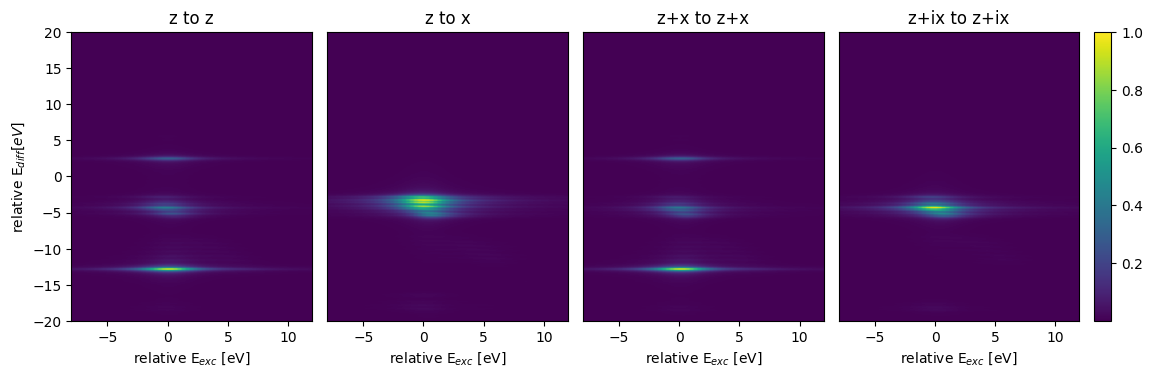

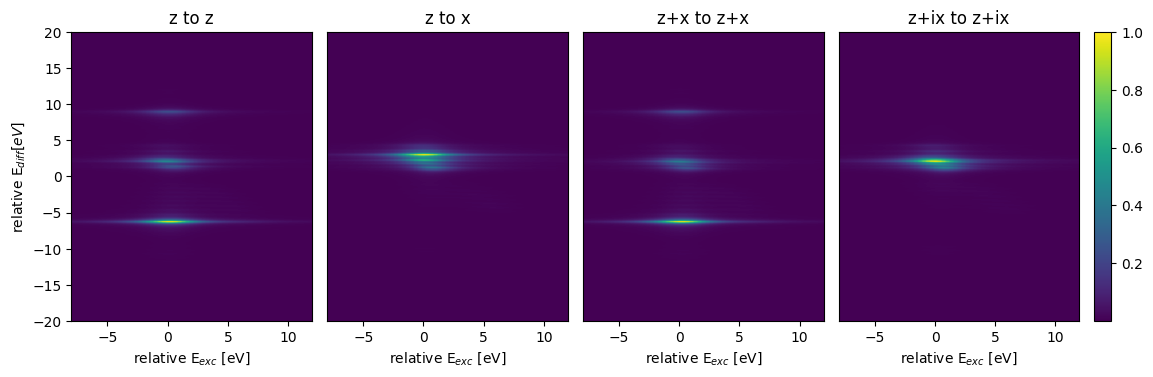

In [12]:
xmin=-8
xmax=12
ymin=-20
ymax=20
plot_RIXS_array("Ba3UO6","No","M4",xmin,xmax,ymin,ymax)
plot_RIXS_array("Ba3UO6","6d","M4",xmin,xmax,ymin,ymax)

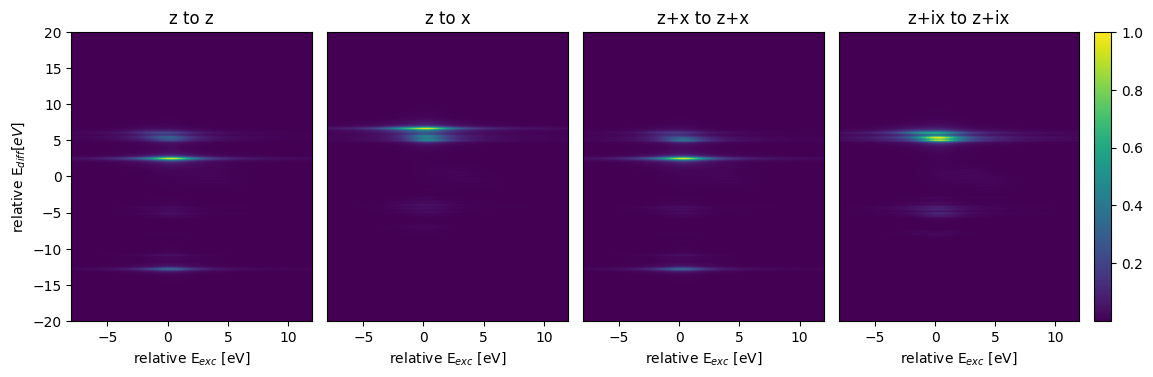

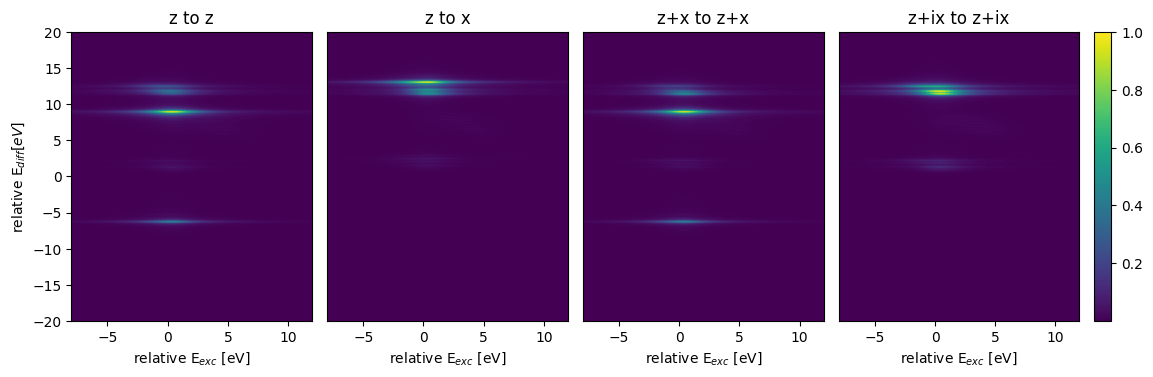

In [13]:
xmin=-8
xmax=12
ymin=-20
ymax=20
plot_RIXS_array("Ba3UO6","No","M5",xmin,xmax,ymin,ymax)
plot_RIXS_array("Ba3UO6","6d","M5",xmin,xmax,ymin,ymax)

# Sr3UO6

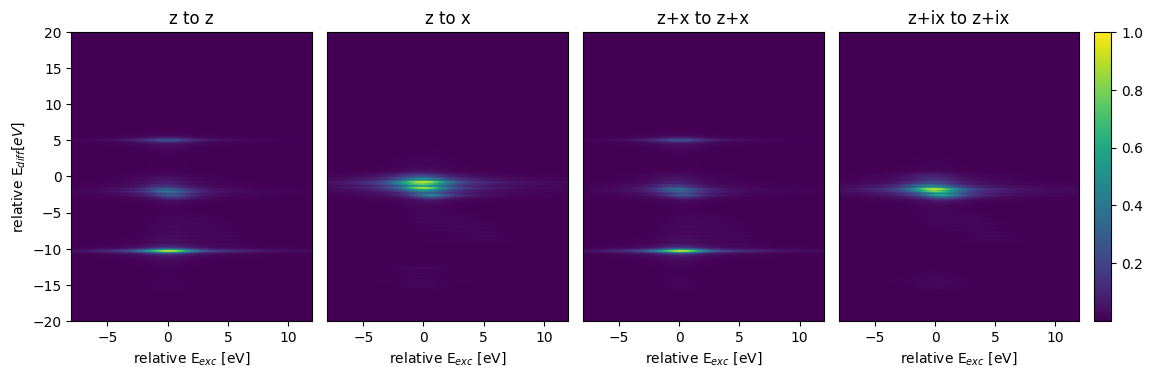

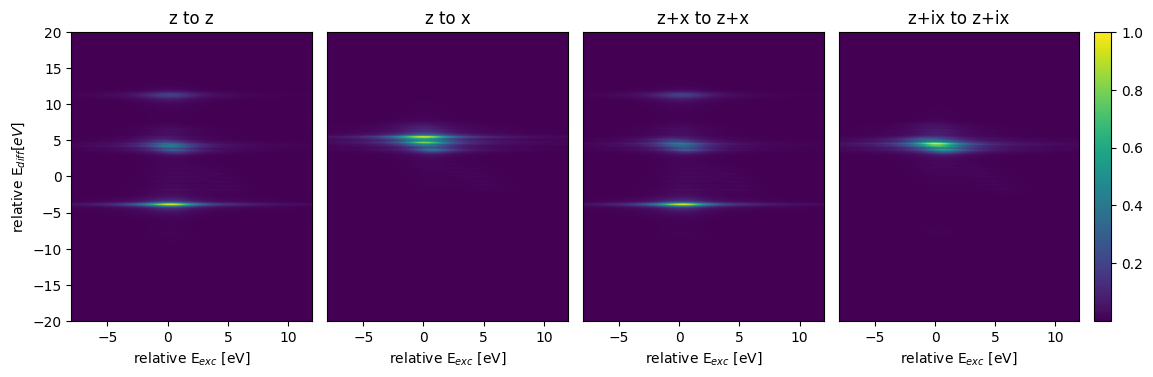

In [14]:
xmin=-8
xmax=12
ymin=-20
ymax=20
plot_RIXS_array("Sr3UO6","No","M4",xmin,xmax,ymin,ymax)
plot_RIXS_array("Sr3UO6","6d","M4",xmin,xmax,ymin,ymax)

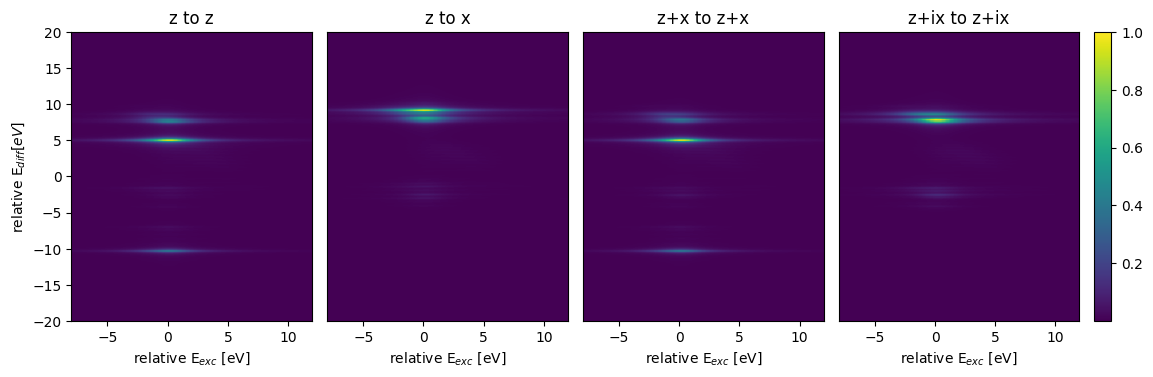

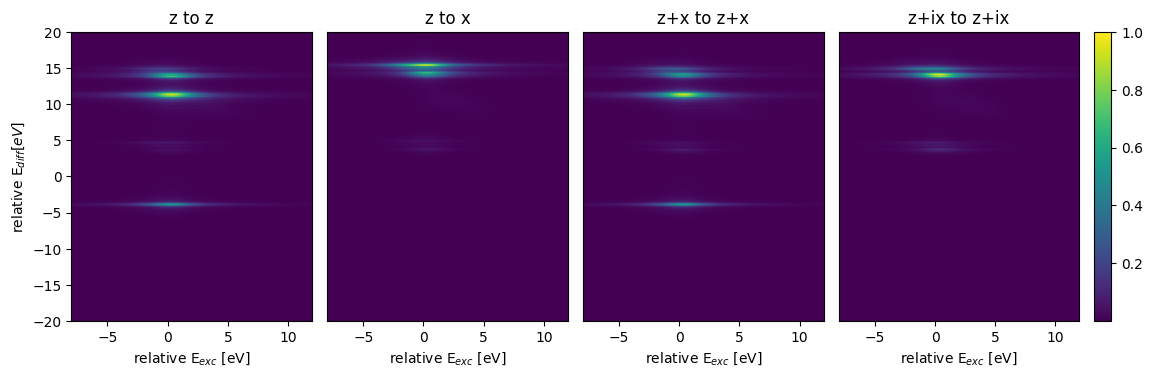

In [5]:
xmin=-8
xmax=12
ymin=-20
ymax=20
plot_RIXS_array("Sr3UO6","No","M5",xmin,xmax,ymin,ymax)
plot_RIXS_array("Sr3UO6","6d","M5",xmin,xmax,ymin,ymax)

# UF6

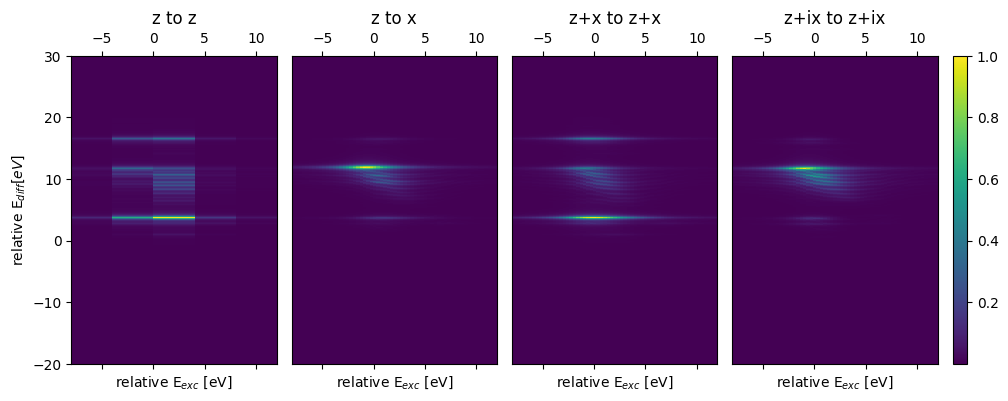

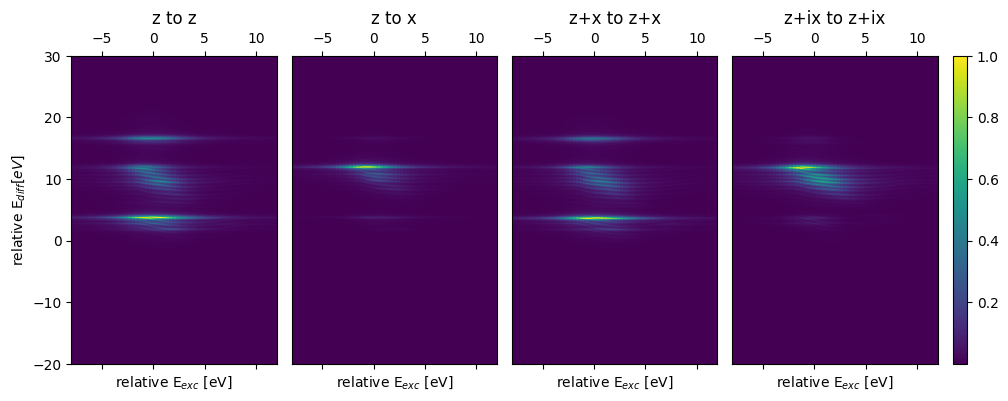

In [25]:
xmin=-8
xmax=12
ymin=-20
ymax=30
plot_RIXS_array("UF6","No","M4",xmin,xmax,ymin,ymax)
plot_RIXS_array("UF6_old","No","M4",xmin,xmax,ymin,ymax)

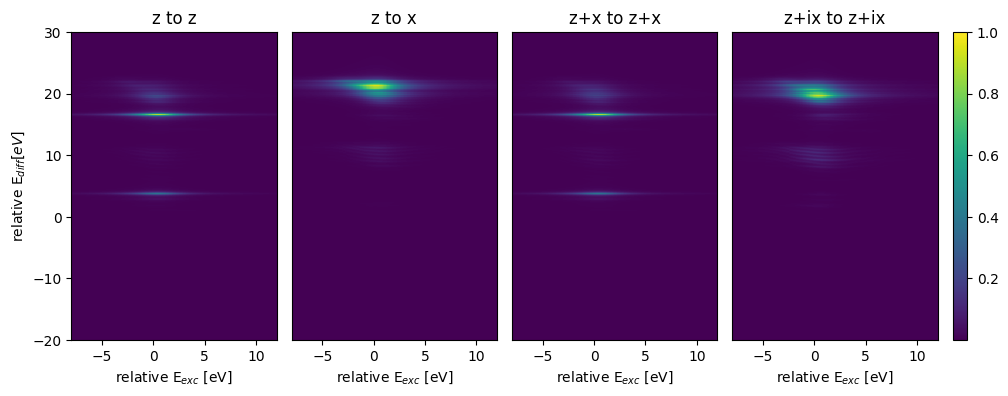

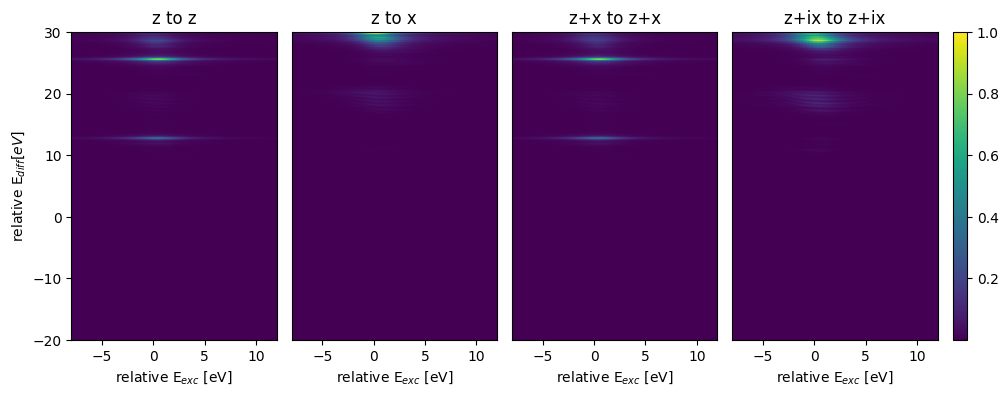

In [22]:
xmin=-8
xmax=12
ymin=-20
ymax=30
plot_RIXS_array("UF6","No","M5",xmin,xmax,ymin,ymax)
plot_RIXS_array("UF6","6d","M5",xmin,xmax,ymin,ymax)

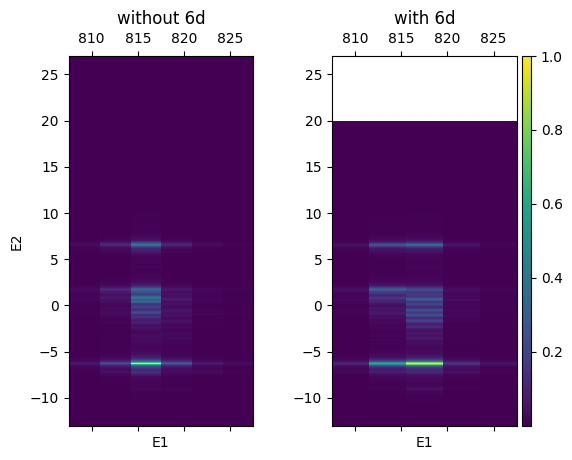

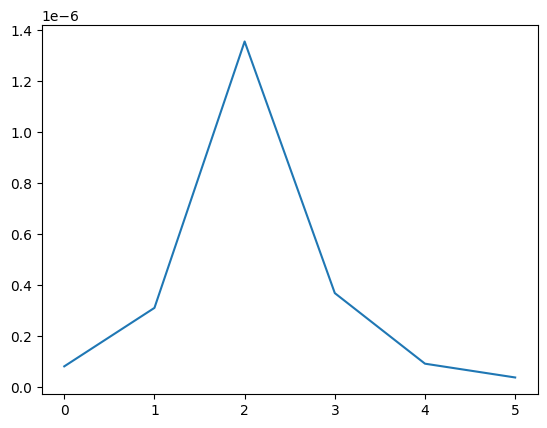

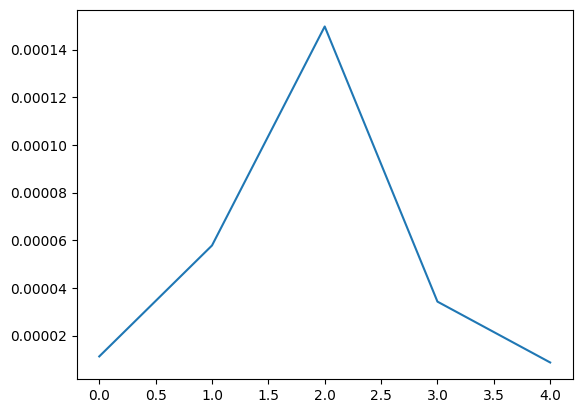

In [23]:
xmin=807.5
xmax=827.5
ymin=-100
ymax=100
RIXS_small=getRixs("UF6/data/RIXS/size_RIXSM4_No_z_z2.dat")
RIXS_large=getRixs("UF6/data/RIXS/No/M4/RIXS_z_z.dat")

#ylim=[-13,27]

ax1 = plt.subplot(121)
ax1.set_title("without 6d")
ax1.set_ylim(*ylim)
ax1.set_ylabel("E2")
ax1.set_xlabel("E1")
ax1.matshow(RIXS_small/RIXS_small.max())#,extent=[xmin,xmax,ymin,ymax]

ymin=-20
ymax=30
ax2 = plt.subplot(122)
ax2.set_title("with 6d")
ax2.set_xlabel("E1")
ax2.set_ylim(*ylim)
#ax2.axes.get_yaxis().set_visible(False)
im = ax2.matshow(RIXS_large/RIXS_large.max())#,extent=[xmin,xmax,ymin,ymax]
divider = make_axes_locatable(ax2)
cax= divider.append_axes("right",size="5%",pad=0.05)
plt.colorbar(im, cax=cax, orientation="vertical")
plt.show()
plt.plot(RIXS_small[500])
plt.show()
plt.plot(RIXS_large[int(len(RIXS_large)*3/5)])

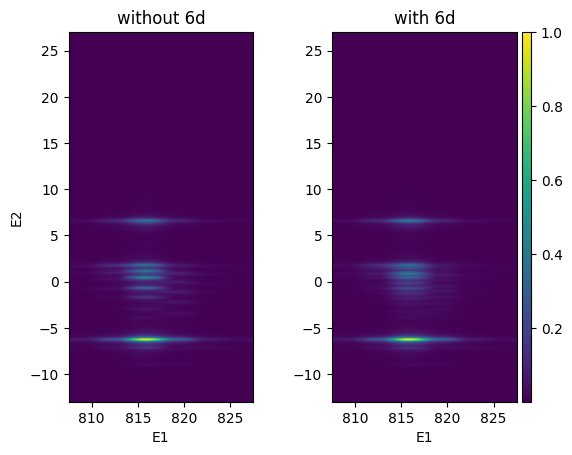

In [9]:
xmin=807.5
xmax=827.5
ymin=-100
ymax=100
RIXS_small=getRixs("UF6/data/RIXS/size_RIXSM4_No_z_z.dat")
RIXS_large=getRixs("UF6/data/RIXS/size_RIXSM4_No_z_z2.dat")
ylim=[-13,27]

ax1 = plt.subplot(121)
ax1.set_title("without 6d")
ax1.set_ylim(*ylim)
ax1.set_ylabel("E2")
ax1.set_xlabel("E1")
ax1.imshow(RIXS_small/RIXS_small.max(),extent=[xmin,xmax,ymin,ymax])

ax2 = plt.subplot(122)
ax2.set_title("with 6d")
ax2.set_xlabel("E1")
ax2.set_ylim(*ylim)
#ax2.axes.get_yaxis().set_visible(False)
im = ax2.imshow(RIXS_large/RIXS_large.max(),extent=[xmin,xmax,ymin,ymax])
divider = make_axes_locatable(ax2)
cax= divider.append_axes("right",size="5%",pad=0.05)
plt.colorbar(im, cax=cax, orientation="vertical")
plt.show()

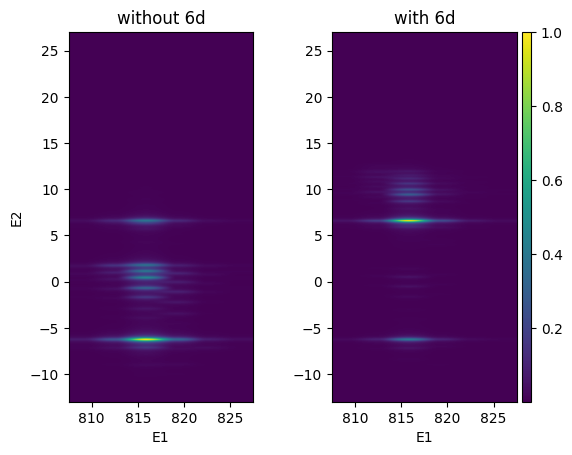

In [17]:
xmin=807.5
xmax=827.5
ymin=-100
ymax=100
RIXS_small=getRixs("UF6/data/RIXS/size_RIXSM4_No_z_z.dat")
RIXS_large=getRixs("UF6/data/RIXS/size_RIXSM5_No_z_z.dat")
ylim=[-13,27]

ax1 = plt.subplot(121)
ax1.set_title("without 6d")
ax1.set_ylim(*ylim)
ax1.set_ylabel("E2")
ax1.set_xlabel("E1")
ax1.imshow(RIXS_small/RIXS_small.max(),extent=[xmin,xmax,ymin,ymax])

ax2 = plt.subplot(122)
ax2.set_title("with 6d")
ax2.set_xlabel("E1")
ax2.set_ylim(*ylim)
#ax2.axes.get_yaxis().set_visible(False)
im = ax2.imshow(RIXS_large/RIXS_large.max(),extent=[xmin,xmax,ymin,ymax])
divider = make_axes_locatable(ax2)
cax= divider.append_axes("right",size="5%",pad=0.05)
plt.colorbar(im, cax=cax, orientation="vertical")
plt.show()

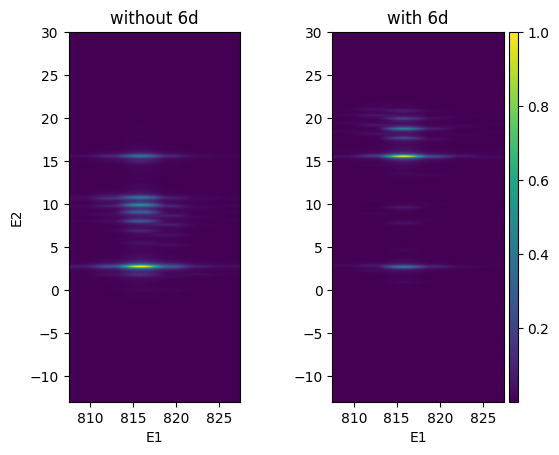

In [20]:
xmin=807.5
xmax=827.5
ymin=-100
ymax=100
RIXS_small=getRixs("UF6/data/RIXS/size_RIXSM4_6d_z_z.dat")
RIXS_large=getRixs("UF6/data/RIXS/size_RIXSM5_6d_z_z.dat")
ylim=[-13,30]

ax1 = plt.subplot(121)
ax1.set_title("without 6d")
ax1.set_ylim(*ylim)
ax1.set_ylabel("E2")
ax1.set_xlabel("E1")
ax1.imshow(RIXS_small/RIXS_small.max(),extent=[xmin,xmax,ymin,ymax])

ax2 = plt.subplot(122)
ax2.set_title("with 6d")
ax2.set_xlabel("E1")
ax2.set_ylim(*ylim)
#ax2.axes.get_yaxis().set_visible(False)
im = ax2.imshow(RIXS_large/RIXS_large.max(),extent=[xmin,xmax,ymin,ymax])
divider = make_axes_locatable(ax2)
cax= divider.append_axes("right",size="5%",pad=0.05)
plt.colorbar(im, cax=cax, orientation="vertical")
plt.show()

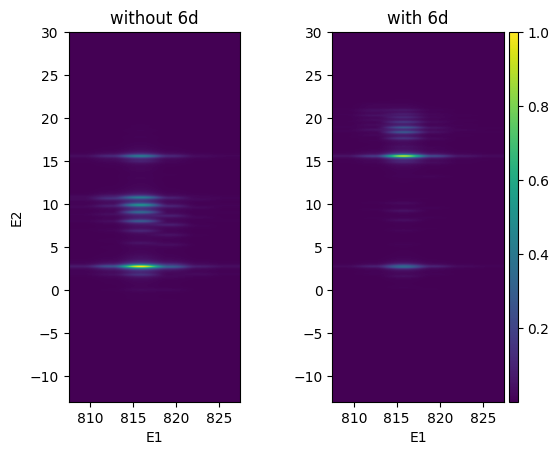

In [8]:
xmin=807.5
xmax=827.5
ymin=-100
ymax=100
RIXS_small=getRixs("UF6/data/RIXS/size_RIXSM4_6d_z_z.dat")
RIXS_large=getRixs("UF6/data/RIXS/size_RIXSM5_6d_z_z.dat")
ylim=[-13,30]

ax1 = plt.subplot(121)
ax1.set_title("without 6d")
ax1.set_ylim(*ylim)
ax1.set_ylabel("E2")
ax1.set_xlabel("E1")
ax1.imshow(RIXS_small/RIXS_small.max(),extent=[xmin,xmax,ymin,ymax])

ax2 = plt.subplot(122)
ax2.set_title("with 6d")
ax2.set_xlabel("E1")
ax2.set_ylim(*ylim)
#ax2.axes.get_yaxis().set_visible(False)
im = ax2.imshow(RIXS_large/RIXS_large.max(),extent=[xmin,xmax,ymin,ymax])
divider = make_axes_locatable(ax2)
cax= divider.append_axes("right",size="5%",pad=0.05)
plt.colorbar(im, cax=cax, orientation="vertical")
plt.show()